# Titanic competition

In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import polars as pl
import matplotlib.pyplot as plt
import plotly.express as px

plt.rcParams['figure.figsize'] = (20, 10)
import plotly.graph_objects as go

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./kaggle/input'):
    print(dirname)
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./kaggle/input
./kaggle/input\gender_submission.csv
./kaggle/input\test.csv
./kaggle/input\test_sampled.csv
./kaggle/input\titanic.zip
./kaggle/input\train.csv
./kaggle/input\train_sampled.csv


In [37]:
import glob
from sklearn.model_selection import train_test_split

df = pl.read_csv('./kaggle/input/train.csv')
splits = train_test_split(df, test_size=0.25, random_state=0, shuffle=True, stratify=df.select("Survived"),)
train: pl.DataFrame = splits[0]
test: pl.DataFrame = splits[1]

if len(glob.glob('**/train_sampled.csv', recursive=True)) == 0:
    train.write_csv('./kaggle/input/train_sampled.csv')
    test.write_csv('./kaggle/input/test_sampled.csv')

In [38]:
train.shape

(668, 12)

In [39]:
train.describe()

describe,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
str,f64,f64,f64,str,str,f64,f64,f64,str,f64,str,str
"""count""",668.0,668.0,668.0,"""668""","""668""",668.0,668.0,668.0,"""668""",668.0,"""668""","""668"""
"""null_count""",0.0,0.0,0.0,"""0""","""0""",136.0,0.0,0.0,"""0""",0.0,"""515""","""2"""
"""mean""",444.244012,0.383234,2.299401,null,null,29.796842,0.502994,0.363772,null,33.273328,null,null
"""std""",260.923752,0.486539,0.841324,null,null,14.477953,1.061098,0.7846,null,53.472183,null,null
"""min""",2.0,0.0,1.0,"""Abbott, Mr. Ro…","""female""",0.42,0.0,0.0,"""110152""",0.0,"""A10""","""C"""
"""max""",891.0,1.0,3.0,"""van Melkebeke,…","""male""",80.0,8.0,6.0,"""WE/P 5735""",512.3292,"""T""","""S"""
"""median""",444.5,0.0,3.0,null,null,29.0,0.0,0.0,null,14.4542,null,null
"""25%""",218.0,0.0,2.0,null,null,20.0,0.0,0.0,null,7.925,null,null
"""75%""",676.0,1.0,3.0,null,null,38.0,1.0,0.0,null,30.5,null,null


In [40]:
train.head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
672,0,1,"""Davidson, Mr. …","""male""",31.0,1,0,"""F.C. 12750""",52.0,"""B71""","""S"""
418,1,2,"""Silven, Miss. …","""female""",18.0,0,2,"""250652""",13.0,null,"""S"""
635,0,3,"""Skoog, Miss. M…","""female""",9.0,3,2,"""347088""",27.9,null,"""S"""
324,1,2,"""Caldwell, Mrs.…","""female""",22.0,1,1,"""248738""",29.0,null,"""S"""
380,0,3,"""Gustafsson, Mr…","""male""",19.0,0,0,"""347069""",7.775,null,"""S"""


In [41]:
df_cabin_prefix = train.with_columns(pl.col("Cabin").str.replace("\d+", "", n=-1).apply(lambda x: x[0]).alias("Cabin_prefix"))
fig = px.box(df_cabin_prefix.sort("Cabin_prefix"), x="Fare", y="Cabin_prefix", color="Cabin_prefix")
fig.show()

In [72]:
df_cabin_prefix

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_prefix
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str,str
672,0,1,"""Davidson, Mr. …","""male""",31.0,1,0,"""F.C. 12750""",52.0,"""B71""","""S""","""B"""
418,1,2,"""Silven, Miss. …","""female""",18.0,0,2,"""250652""",13.0,null,"""S""",null
635,0,3,"""Skoog, Miss. M…","""female""",9.0,3,2,"""347088""",27.9,null,"""S""",null
324,1,2,"""Caldwell, Mrs.…","""female""",22.0,1,1,"""248738""",29.0,null,"""S""",null
380,0,3,"""Gustafsson, Mr…","""male""",19.0,0,0,"""347069""",7.775,null,"""S""",null
251,0,3,"""Reed, Mr. Jame…","""male""",null,0,0,"""362316""",7.25,null,"""S""",null
652,1,2,"""Doling, Miss. …","""female""",18.0,0,1,"""231919""",23.0,null,"""S""",null
75,1,3,"""Bing, Mr. Lee""","""male""",32.0,0,0,"""1601""",56.4958,null,"""S""",null
219,1,1,"""Bazzani, Miss.…","""female""",32.0,0,0,"""11813""",76.2917,"""D15""","""C""","""D"""


In [26]:
fig = px.box(train, x="Fare", y="Embarked", color="Embarked")
fig.show()

In [44]:
df = train.groupby("Embarked").agg(pl.col("Survived").sum()/pl.col("Survived").count(), pl.col("Fare").mean()).filter(pl.col("Embarked").is_not_null())
fig = px.bar(df, x="Embarked", y="Survived", color="Embarked", orientation="v")
fig.show()

In [66]:
import plotly.express as px
df = df_cabin_prefix.groupby("Cabin_prefix").agg(
    pl.col("Survived").sum()/pl.col("Survived").count().alias("count_survived"),
    pl.col("Pclass").filter(pl.col("Pclass") == 1).count().alias("class 1"),
    pl.col("Pclass").filter(pl.col("Pclass") == 2).count().alias("class 2"),
    pl.col("Pclass").filter(pl.col("Pclass") == 3).count().alias("class 3"),
    pl.col("Fare").mean(),
    ).filter(pl.col("Cabin_prefix") != "nan").pivot(index=["Cabin_prefix"], columns=["Pclass"], values="count_survived").to_pandas()
fig = px.bar(df.sort("Cabin_prefix"), x="Cabin_prefix", y="Survived", color="Cabin_prefix", orientation="v")
fig.show()

In [86]:
df_cabin_prefix.groupby("Pclass", "Cabin_prefix").agg(
    pl.col("Survived").sum().alias("count_survived"),
    pl.col("Pclass").count().alias("count_total"),
    pl.col("Fare").mean(),
    ).filter(pl.col("Cabin_prefix") != "nan")

Pclass,Cabin_prefix,count_survived,count_total,Fare
i64,str,i64,u32,f64
2,"""D""",2,3,12.958333
1,"""T""",0,1,35.5
3,"""F""",0,2,7.65
1,"""B""",31,43,118.31977
2,"""E""",3,4,11.5875
1,"""D""",17,24,62.565629
1,"""C""",27,45,97.551387
3,"""G""",1,3,12.541667
2,"""F""",4,4,21.5


c:\Users\gaetd\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-titanic-xNW5dI96-py3.11\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



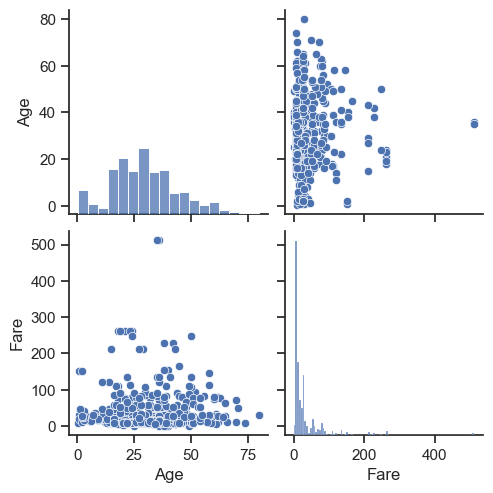

In [60]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(train.select("Age", "Fare").to_pandas())

# simplest model possible

In [17]:
import mlflow
from mlflow import log_metric, log_param, log_params, log_artifacts
from mlflow.models.signature import infer_signature
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

with mlflow.start_run() as run:    
    X = data.drop(['Survived', 'Name'], axis=1).iloc[:, :-1].dropna(axis=1)
    y = data.Survived

    categorical_cols = X.columns.difference(numeric_cols)

    estimators = [
    (
        'categorical_cols', 
        ColumnTransformer(
            [(
                'ordinalEn',
                OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), 
                categorical_cols
                )]
        )
    ),
    ('imputer', SimpleImputer()),
    (
        'clf', LogisticRegression()
    )
    ]
    pipe = Pipeline(estimators)

    pipe.fit(X, y)
    predictions = pipe.predict(X)
    log_metric("c", float(pipe.score(X, y)))
    #signature = infer_signature(X, predictions)
    mlflow.sklearn.log_model(pipe, "models")

    print("Run ID: {}".format(run.info.run_id))


c:\Users\gaetd\AppData\Local\pypoetry\Cache\virtualenvs\kaggle-titanic-xNW5dI96-py3.11\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Run ID: fa8422c1982744578ccd86e1cd108c2d


In [23]:
import mlflow

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

model = mlflow.sklearn.load_model("runs:/fa8422c1982744578ccd86e1cd108c2d/models")
predictions = model.predict(X)
print(predictions)

[0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0
 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1
 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0
 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1
 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0
 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0
 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0
 0 1 0 0 1 0 0 0 0 1 1 0 